# **\[EPT\]** 비트시그널 분석

jiyun Lim  
2023-08-22

-   ref:<https://codeocean.com/capsule/5029478/tree/v1>

# Analysis of beat signal

Ensemble Patch Transformation 논문[1]의 비트시그널 부분을 정리한 것이다.

주어진 신호 $X_t$를 그 구성성분인 $h_t$와 $g_t$로 분해하는 과정에 대해
다룬 내용이다. 여기서 신호의 구성성분인 $h_t$와 $g_t$는 매우 비슷한
주파수를 가지고 있다.

다음과 같은 신호가 있다고 가정해보자.

$X_t = h_t + g_t:= \cos(62\pi t) + \cos(58\pi t)$

[1] Kim, Oh, and Choi (2021)

In [2]:
# library(EPT)

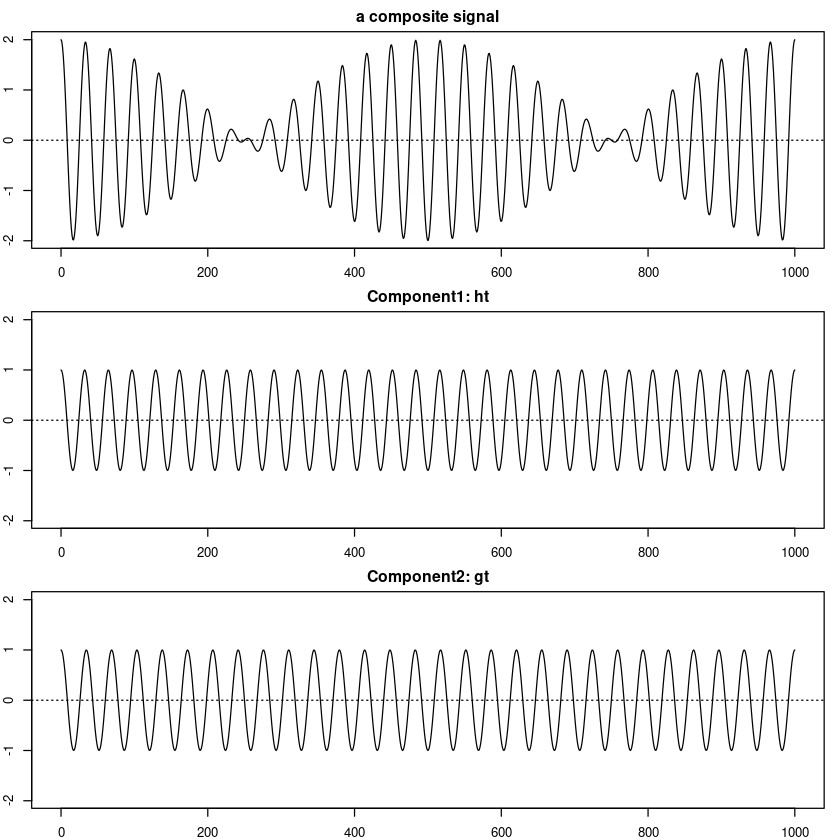

In [58]:
# generate a composite signal f
tt <- seq(0, 1000, length=1000)
comp1 <- cos(62*pi*tt); comp2 <- cos(58*pi*tt) # 주어진 신호의 두 성분
f <- comp1 + comp2 # 주어진 신호

# plot of a composite signal f
par(mfcol=c(3, 1), mar=c(2, 2, 2, 1))
plot(tt, f, main="a composite signal", type='l', ylim=range(f))
abline(h=0, lty=3)
plot(tt, comp1, main="Component1: ht", type='l', ylim=range(f))
abline(h=0, lty=3)
plot(tt, comp2, main="Component2: gt", type='l', ylim=range(f))
abline(h=0, lty=3)
# dev.off()

위의 그림에서도 볼 수 있듯이 신호를 구성하는 각각의 요소 $h_t$와 $g_t$는
매우 비슷한 주파수를 가지고 있다. (굳이 따지자면 $h_t$가 high frequency,
$g_t$가 low frequency)

<figure class="margin-caption">
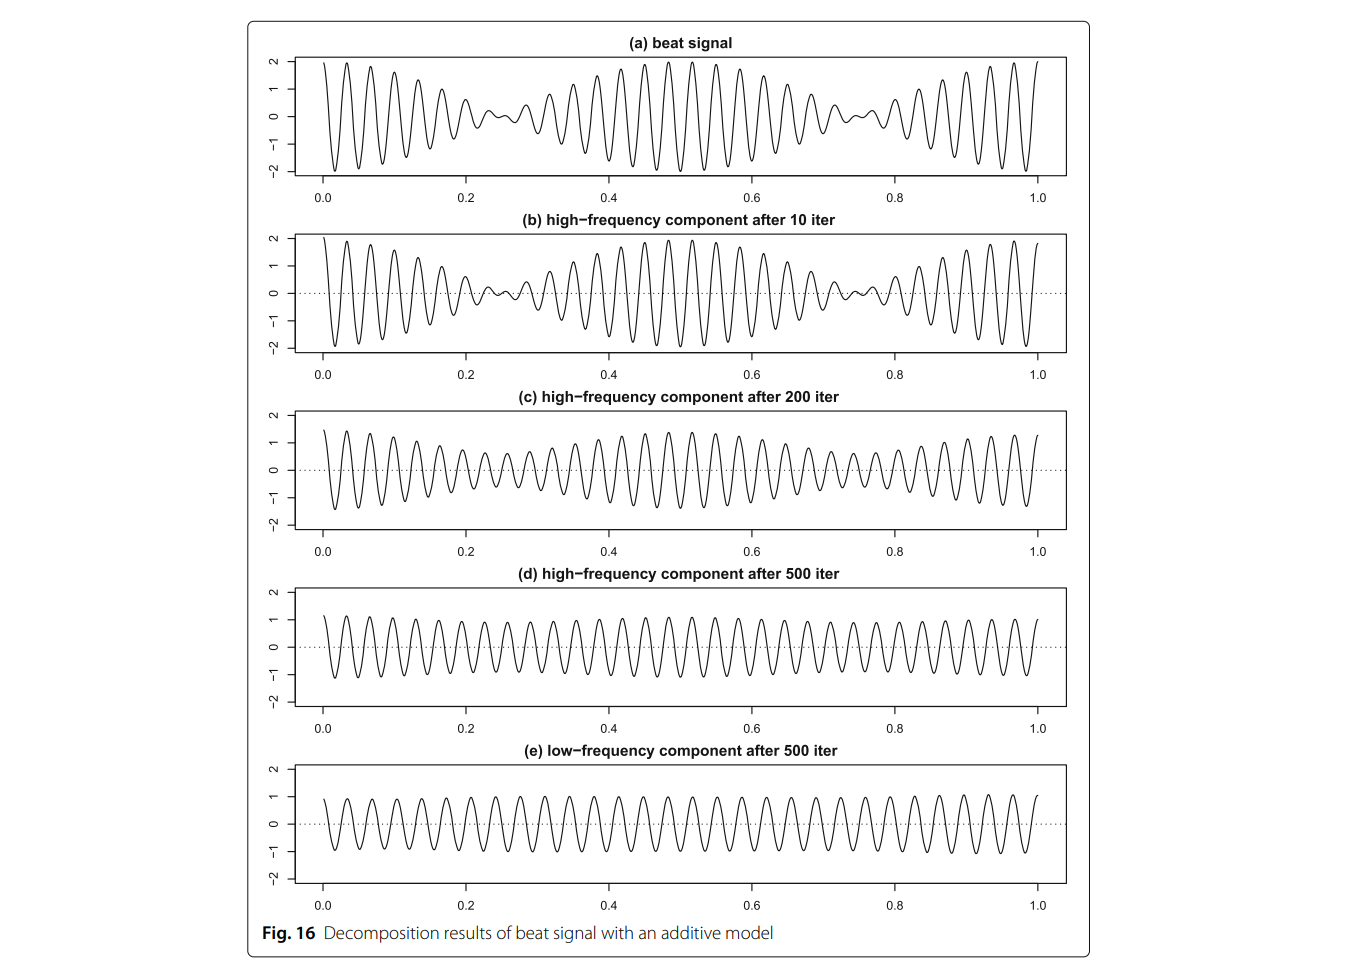
<figcaption aria-hidden="true"><span class="citation"
data-cites="kim2021ept">Kim, Oh, and Choi (2021)</span> 가법모형에서의
비트시그널 분해 결과</figcaption>
</figure>

두 개의 유사한 주파수를 가진 구성 요소로 이루어진 신호는, Figure 16a에서
보여지는 것과 같이 비트 신호를 생성한다.

$h_t$와 $g_t$는 $X_t - IR_t^{(k)}(X_t, \cal{M})$ 과
$IR_t^{(k)}(X_t, {\cal{M}})$로 분해될 수 있다. 여기서
${\cal{M}}X_t = \text{EAve}_i^{\tau_0}(X_t)$이다. 그리고 $\tau_0 = 29$는
컴포넌트 $g_t$의 주기이다.

Theorem1에 의해 $k\to \infty$일 때 $IR_t^{(k)}(X_t,{\cal M}) \to g_t$ 로
근사하므로, $X_t - IR_t^{(k)}(X_t,{\cal M}) \to h_t$가 된다.

Fig16의 b에서 d까지가 $k$가 각각 $10,200,500$일 때
$X_t - IR_t^{(k)}(X_t,{\cal M})$를 나타내고, e부분은 $k=500$일 때
$IR_t^{(k)}(X_t,{\cal M})$를 보여준다. 여기서 알 수 있는 것은 $k$가
충분히 커야 두 요소를 분해할 수 있다는 것이다.

<figure class="margin-caption">
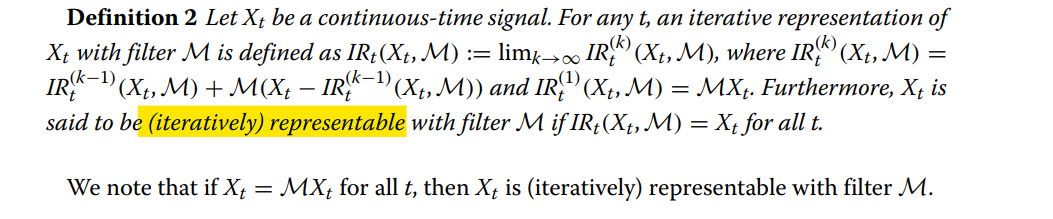
<figcaption aria-hidden="true">필터를 거치게 되면 사라지는 애들이 있고
남아있는 애들이 있는데 여기서 요소 <span
class="math inline"><em>X</em><sub><em>t</em></sub></span>는 필터를 거쳐
나타내어 지는 요소 (반복적으로 수행하게 되면 더하고 더하고 더해지니까
결국 원래 신호 <span
class="math inline"><em>X</em><sub><em>t</em></sub></span>로
수렴?)</figcaption>
</figure>

<figure class="margin-caption">
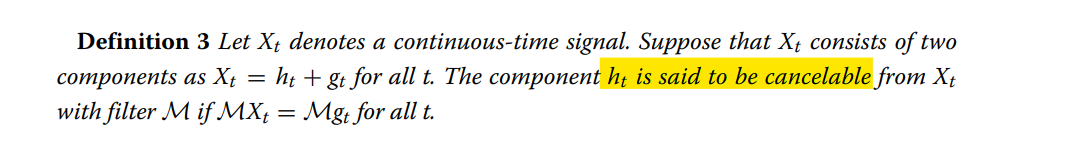
<figcaption aria-hidden="true">여기서 <span
class="math inline"><em>h</em><sub><em>t</em></sub></span>는 필터에
의해서 사라질 수 있는 요소. (반복적인 컨볼루션 연산?)</figcaption>
</figure>

분해 결과는 의미가 있을 수 있지만, 원하는 신호를 추출하려면 너무 많은
반복이 필요하기 때문에 실용적이지는 않다. 위의 예제만 봐도 500번이나
반복해야 한다.

이러한 비트시그널을 다른 관점에서도 볼 수 있다. (두 신호의 곱으로 볼
수도 있다.)

$X_t = \cos(62\pi t) + \cos(58\pi t) = 2\cos(2\pi t)\cos(60\pi t)$

> **삼각함수 공식**
>
> $\cos x + \cos y = 2\cos\left(\frac{x+y}{2}\right) \cos\left(\frac{x-y}{2}\right)$

<figure class="margin-caption">
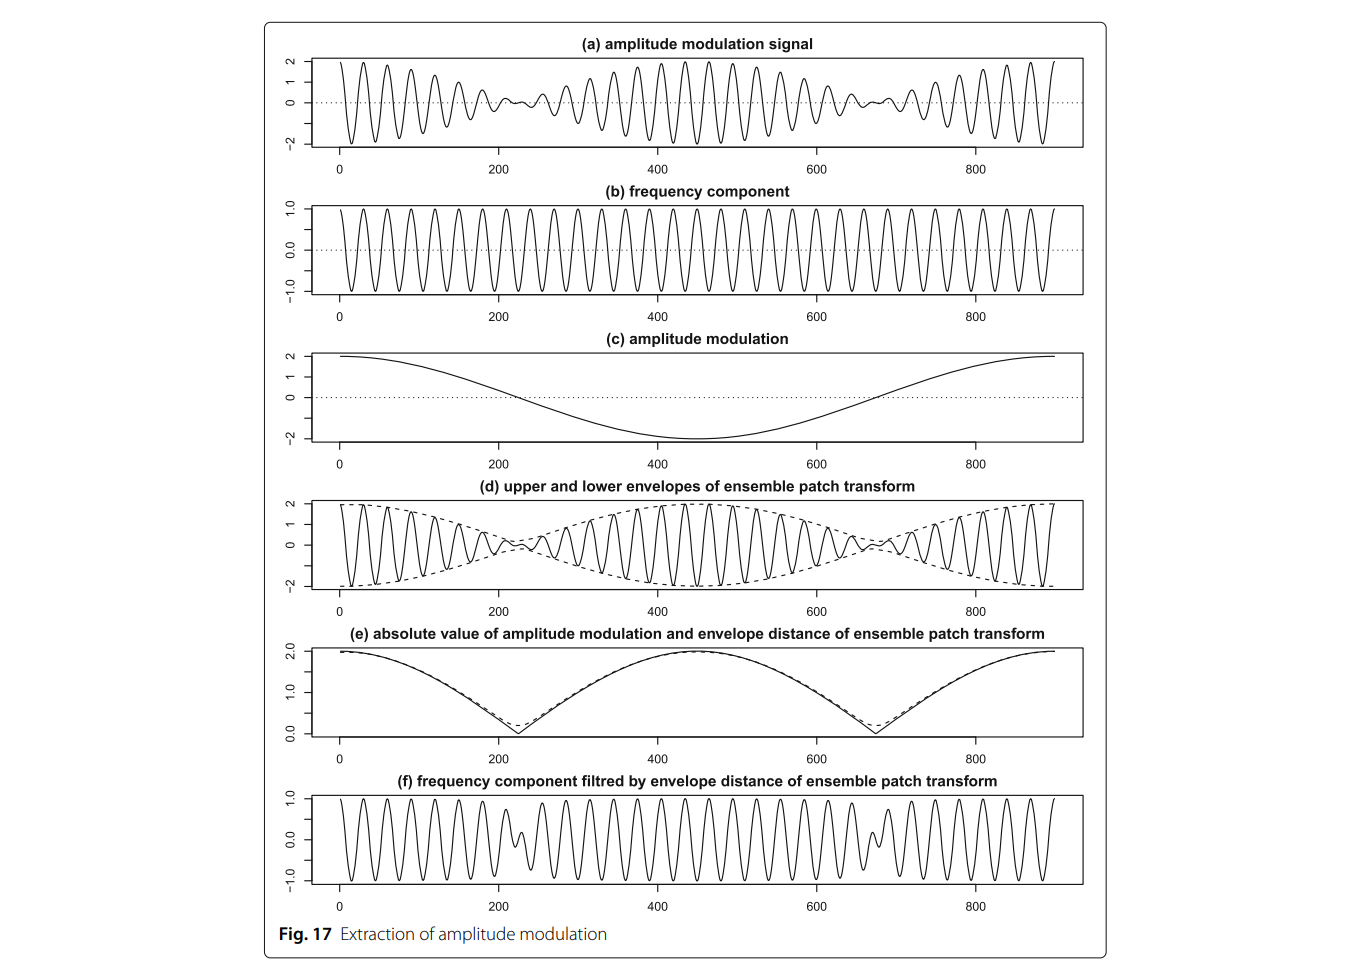
<figcaption aria-hidden="true"><span class="citation"
data-cites="kim2021ept">Kim, Oh, and Choi (2021)</span></figcaption>
</figure>

Figure 17a에 나타난 것처럼, 이 신호는 $\cos(60\pi t)$ 신호에 진폭 변조
항인 $2 \cos(2\pi t)$를 곱한 것으로 해석할 수 있다.

Figure 17b와 c는 $X_t$의 주파수 성분과 진폭 변조 성분을 각각 나타낸다.
(b: 주파수 성분, d: 진폭변조)

Figure 17d는 앙상블 패치 변환의 upper envelope과 lower envelope을
보여준다.(size parameter τ = 30) , 점선부분은 upper envelope과 lower
envelope의 범위를 나타낸다. 이 범위를 ensemble envelope range라고 하며
기호로는 $ER_t$.

Figure 17e의 실선으로 표시된 진폭 변조 $2\cos(2\pi t)$의 절대값은,
점선으로 표시된 $ER_t^\tau / 2$에 의해 아주 잘 근사된다.

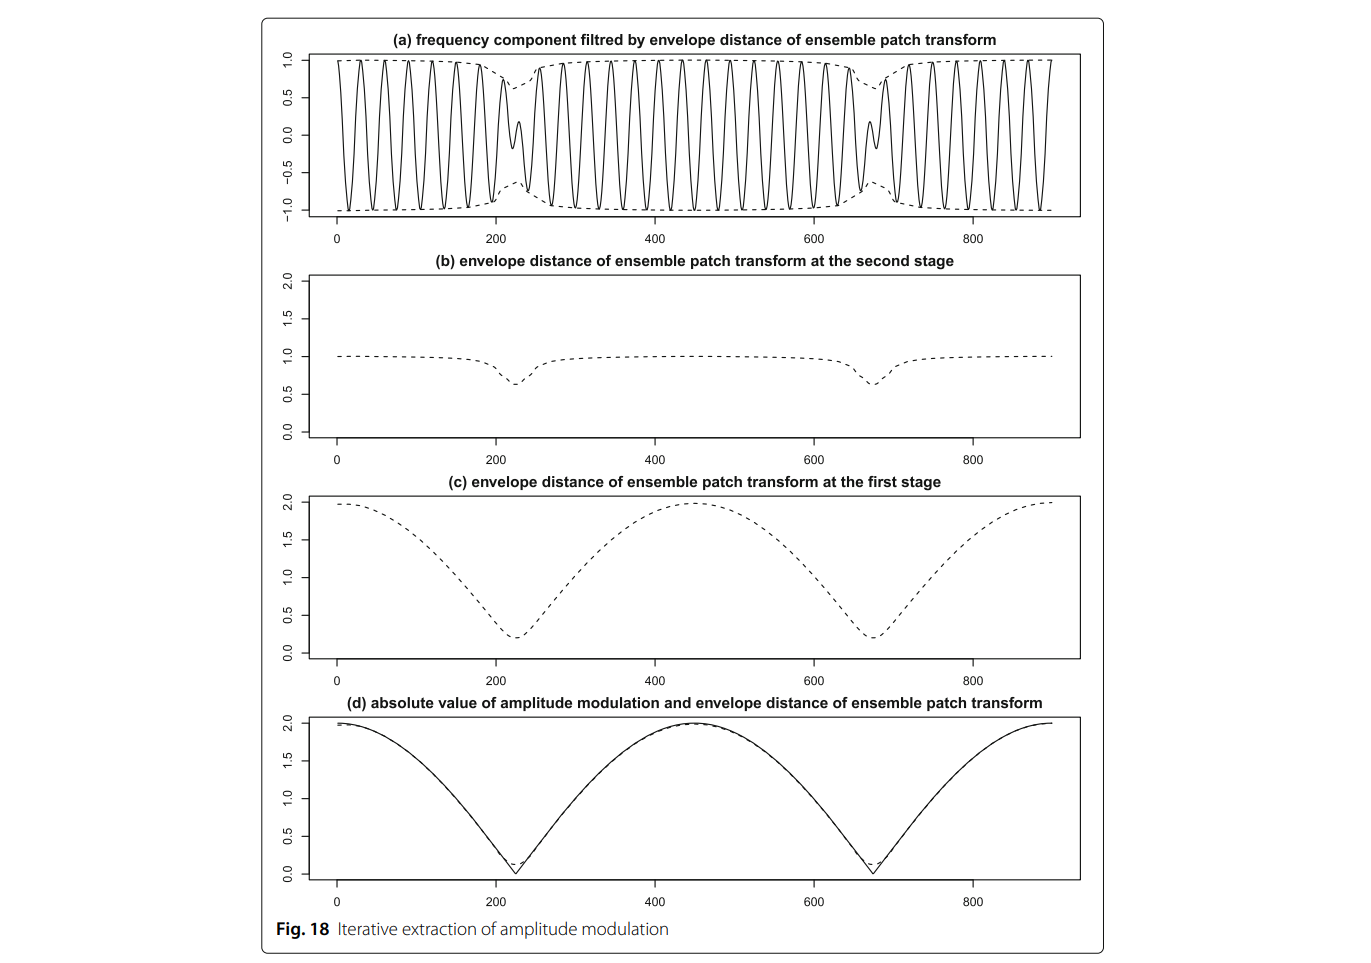

Figure 18a는 필터링된 신호의 EPT의 upper envelope과 lower envelope를
보여준다.

Figure 18b에서 얻은 앙상블 패치 범위를 필터링된 신호에 곱하면, 첫번째
단계의 Figure 18c의 앙상블 패치 범위와 곱하는 것으로, 근사치를 개선할 수
있다. 이렇게 개선된 근사치는 d의 점선으로 나타난다.

이 근사치는 크게 개선되며, 진폭 변조 $2\cos(2\pi t)$가 거의 $0$에
가까워진다. 이 앙상블 패치 변환(EPT)는 진폭 변조 정보를 추론하는 데
활용될 수 있다. 여기서 진폭 정보는 주파수 정보와 결합된 형태로 포함되어
있다.

단, 진폭 변조 성분(amplitude modulating component)은 양수여야 한다.
그럼에도 불구하고, 현실세계 신호의 진폭 변조 성분은 양수일 수 있기
때문에 위의 필터링 방법은 실제로 적용 가능하다.

태양 복사에 관한 예시~

Kim, Donghoh, Hee-Seok Oh, and Guebin Choi. 2021. “EPT: An r Package for
Ensemble Patch Transform.” *SoftwareX* 14: 100704.